In [1]:
import tensorflow as  tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('linear_regression.csv', header = None).values

In [3]:
x = data[:, 0]
y = data[:, 1]

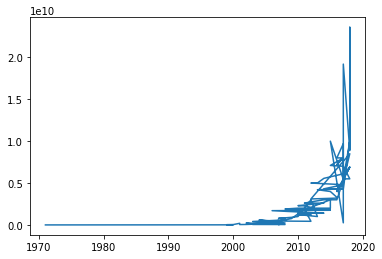

In [4]:
plt.plot(x, y)

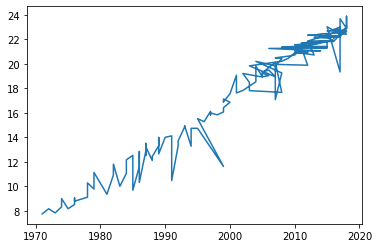

In [5]:
y = np.log(y)
plt.plot(x, y)

In [6]:
x = x - x.mean()

In [7]:
model = tf.keras.models.Sequential()

In [8]:
model.add(tf.keras.layers.Dense(1, input_shape= (1, )))

In [9]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.SGD(0.001, 0.9))

In [10]:
def schedule(epochs, lr): # lr is learning rate
    if epochs >= 50 :
        return 0.0001
    return 0.001
# returns learning rate

In [11]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [12]:
r = model.fit(x, y, epochs = 200, callbacks = [scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 2ms/sample - loss: 343.2355
Epoch 2/200
162/162 [==============================] - 0s 99us/sample - loss: 368.2122
Epoch 3/200
162/162 [==============================] - 0s 98us/sample - loss: 335.7046
Epoch 4/200
162/162 [==============================] - 0s 74us/sample - loss: 205.5127
Epoch 5/200
162/162 [==============================] - 0s 92us/sample - loss: 183.2165
Epoch 6/200
162/162 [==============================] - 0s 105us/sample - loss: 149.4371
Epoch 7/200
162/162 [==============================] - 0s 111us/sample - loss: 106.1348
Epoch 8/200
162/162 [==============================] - 0s 62us/sample - loss: 125.6173
Epoch 9/200
162/162 [==============================] - 0s 111us/sample - loss: 82.2514
Epoch 10/200
162/162 [==============================] - ETA: 0s - loss: 97.36 - 0s 105us/sample - loss: 72.4204
Epoch 11/200
162/162 [==============================] - 0s 98us/sample - loss: 40.9

162/162 [==============================] - 0s 55us/sample - loss: 0.9007
Epoch 190/200
162/162 [==============================] - 0s 80us/sample - loss: 0.8852
Epoch 191/200
162/162 [==============================] - 0s 74us/sample - loss: 0.8754
Epoch 192/200
162/162 [==============================] - 0s 68us/sample - loss: 0.8678
Epoch 193/200
162/162 [==============================] - 0s 43us/sample - loss: 0.9189
Epoch 194/200
162/162 [==============================] - 0s 68us/sample - loss: 0.9095
Epoch 195/200
162/162 [==============================] - 0s 62us/sample - loss: 0.8706
Epoch 196/200
162/162 [==============================] - 0s 86us/sample - loss: 0.8704
Epoch 197/200
162/162 [==============================] - 0s 86us/sample - loss: 0.8727
Epoch 198/200
162/162 [==============================] - 0s 80us/sample - loss: 0.8744
Epoch 199/200
162/162 [==============================] - 0s 86us/sample - loss: 0.8721
Epoch 200/200
162/162 [==============================] - 

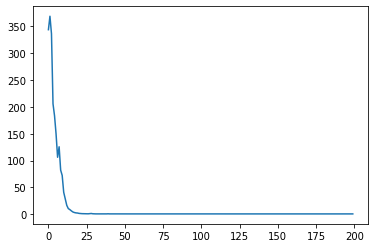

In [13]:
plt.plot(r.history['loss'])

In [15]:
slope = model.layers[0].get_weights()[0]

In [16]:
slope

array([[0.35924843]], dtype=float32)

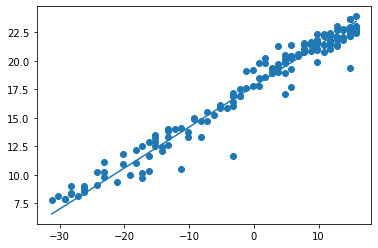

In [18]:
yh = model.predict(x).flatten()
plt.scatter(x, y)
plt.plot(x, yh)

In [19]:
m, c = model.layers[0].get_weights()

In [20]:
x = x.reshape(-1, 1)
Y = x.dot(m) + c
Y = Y.flatten()
np.allclose(Y, yh)

True